<a href="https://colab.research.google.com/github/EgorShestakov/SpringCourse/blob/master/NPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import zipfile
import os
import time

from tensorflow.keras.models import Sequential, load_model
""" полносвязный слой нейронной сети """
from tensorflow.keras.layers import Dense
""" функции для получения обратной связи во время обучения нейронной сети"""
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# """ вспомогательный модуль Keras для предварительной обработки данных """
from tensorflow.keras import utils
""" библиотекf для работы с матрицами (многомерными тензорами) и линейной алгеброй """
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from google.colab import drive
from imblearn.under_sampling import NearMiss


In [25]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data_path = '/content/drive/MyDrive/NPF'
p_tr = '/' + 'train_dataset_train/train' + '/'+ 'train.csv'
p_ts = '/' + 'test' + '/'+ 'test.csv'
train=pd.read_csv(data_path + p_tr)
test=pd.read_csv(data_path + p_ts)
test[:10]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,email,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt
0,0,0x589BC912CB844D468212ADD42EAE4151,0xAA9E8DDF1310724995598EA2B42D7D87,2,1,2017,2017Q2,1,54,6595,...,0,1,-1,-1,398046.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,1
1,2,0xCCF22420C90AE4459A25781A9A30F445,0x3B9B09857D152F468A42C5DEE6D723F7,1,3,2021,2021Q4,1,75,7078,...,-1,-1,-1,-1,0.0,МОСКВА Г,1,1,0,0
2,3,0x943D2C768A4FB38311E6605EEA2B9E4A,0xA7F12C768A4FB38311E835E4A7632E00,1,2,2015,2015Q3,1,35,1675,...,0,-1,-1,-1,666211.0,ИРКУТСКАЯ ОБЛ,-1,1,0,0
3,2,0x99E64FD29CC3B04189C5C9EBEAF6F9A4,0xBFE4BDFBE0E037478C29BA4F38121B15,1,1,2015,2015Q3,1,50,5180,...,-1,-1,-1,-1,162610.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,1
4,0,0x654EEEBA731C4A4881816631229C5B65,0x4B5C7804E403C842B4ECBF69BC3EDD7C,2,1,2011,2011Q3,-1,46,296,...,0,-1,-1,-1,427111.0,УДМУРТСКАЯ РЕСП,1,1,0,1
5,2,0xF122487FAF4C5747BE4D3B63FE775D82,0x2BE14D69E1D797449A658B24274725E4,1,2,2015,2015Q4,1,28,3398,...,-1,-1,-1,-1,606512.0,НИЖЕГОРОДСКАЯ ОБЛ,-1,1,0,0
6,0,0xA629005056964A2C11ED58F4BF8D9DA0,0xA62A005056964A2C11ED84FCEB1528B0,2,3,2022,2022Q2,1,45,198,...,0,-1,-1,-1,693022.0,САХАЛИНСКАЯ ОБЛ,1,-1,0,1
7,0,0xDC5AABE97573364C90FCF3A0332FE891,0xFF24368E83A0B144968BB01B57A1418D,2,1,2022,2022Q1,-1,58,2823,...,0,1,-1,-1,390035.0,РЯЗАНСКАЯ ОБЛ,1,1,0,1
8,0,0x43C9B1CBF066E64FBB46BFCEEF48C429,0xDF013406EFAB584298DCB380629899D0,1,1,2017,2017Q1,1,51,2367,...,0,1,-1,-1,446206.0,САМАРСКАЯ ОБЛ,1,1,0,1
9,2,0x5C73A9B5A4C2D94A94D33E16E1ABBCF1,0x0B0ECAD8062F0142A108C2C902FA7BFF,1,1,2015,2015Q1,-1,45,4991,...,-1,-1,-1,-1,162626.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0


In [13]:
test.columns.tolist()

['slctn_nmbr',
 'client_id',
 'npo_account_id',
 'npo_accnts_nmbr',
 'pmnts_type',
 'year',
 'quarter',
 'gender',
 'age',
 'clnt_cprtn_time_d',
 'actv_prd_d',
 'lst_pmnt_rcnc_d',
 'balance',
 'oprtn_sum_per_qrtr',
 'oprtn_sum_per_year',
 'frst_pmnt_date',
 'lst_pmnt_date_per_qrtr',
 'frst_pmnt',
 'lst_pmnt',
 'pmnts_sum',
 'pmnts_nmbr',
 'pmnts_sum_per_qrtr',
 'pmnts_sum_per_year',
 'pmnts_nmbr_per_qrtr',
 'pmnts_nmbr_per_year',
 'incm_sum',
 'incm_per_qrtr',
 'incm_per_year',
 'mgd_accum_period',
 'mgd_payment_period',
 'phone_number',
 'email',
 'lk',
 'assignee_npo',
 'assignee_ops',
 'postal_code',
 'region',
 'citizen',
 'fact_addrss',
 'appl_mrkr',
 'evry_qrtr_pmnt']

In [4]:
trnsctns=pd.read_csv(data_path + '/'+ 'trnsctns.csv', sep=';')
trnsctns[:10]

,slctn_nmbr,npo_account_id,npo_sum,npo_oprtn_date,npo_oprtn_grp,quarter,year
0,2,0x555990CC98CCF8469BE5911D37811A4A,57.72,2000-01-02,0,2000Q1,2000
1,2,0x555990CC98CCF8469BE5911D37811A4A,288.61,2000-01-03,0,2000Q1,2000
2,2,0x555990CC98CCF8469BE5911D37811A4A,78.04,2000-01-16,1,2000Q1,2000
3,2,0x555990CC98CCF8469BE5911D37811A4A,78.04,2000-02-15,1,2000Q1,2000
4,2,0x555990CC98CCF8469BE5911D37811A4A,85.36,2000-03-16,1,2000Q1,2000
5,2,0x555990CC98CCF8469BE5911D37811A4A,-85.37,2000-04-16,1,2000Q2,2000
6,2,0xF2FE9B5459E085438FAB91113FB7F36F,85.36,2000-07-10,1,2000Q3,2000
7,2,0xF2FE9B5459E085438FAB91113FB7F36F,85.36,2000-08-14,1,2000Q3,2000
8,2,0xF2FE9B5459E085438FAB91113FB7F36F,94.30,2000-09-14,1,2000Q3,2000
9,2,0xF2FE9B5459E085438FAB91113FB7F36F,94.30,2000-10-10,1,2000Q4,2000


In [5]:
cntrbtrs=pd.read_csv(data_path + '/'+ 'cntrbtrs.csv', sep=';')
cntrbtrs[:10]

,slctn_nmbr,npo_accnt_id,accnt_pnsn_schm
0,2,0x66FC8B311E1E204187F41966B73E313F,0.0
1,2,0x675F74AFB447EF40AF1E4C042CCA440C,0.0
2,2,0x6FFA52921209184BA47B1E919B713894,0.0
3,2,0xB51B4374207FE0458B29FD1F9CBF69EB,1.0
4,2,0x7AC3935CC4DADE419F8378B9C276DEF7,2.0
5,2,0xE1E067B53D11184CA8A5268A04E26128,3.0
6,2,0xB71656505FEF9E4FAF0270CF8DFB1AAB,0.0
7,2,0xFF0C17D726CB9745BACE0812C5733BEE,3.0
8,2,0xAAE5396725F5CD47A608999721C637D3,0.0
9,2,0xB78B3B6910DD294AAF43A76A52E5BCEF,2.0


In [16]:
train_ds = pd.DataFrame()
# qrtr
train_ds['balance'] = train['balance']
train_ds['pmnts_nmbr'] = train['pmnts_nmbr']
train_ds['pmnts_sum_per_qrtr'] = train['pmnts_sum_per_qrtr']
train_ds['pmnts_nmbr_per_qrtr'] = train['pmnts_nmbr_per_qrtr']
train_ds['evry_qrtr_pmnt'] = train['evry_qrtr_pmnt']
# year
train_ds['pmnts_sum_per_year'] = train['pmnts_sum_per_year']
train_ds['pmnts_nmbr_per_year'] = train['pmnts_nmbr_per_year']

train_ds['lst_pmnt_rcnc_d'] = train['lst_pmnt_rcnc_d']
train_ds['actv_prd_d'] = train['actv_prd_d']
train_ds['clnt_cprtn_time_d'] = train['clnt_cprtn_time_d']
# train_ds['npo_accnts_nmbr'] = train['npo_accnts_nmbr'] # 1
train_ds['appl_mrkr'] = train['appl_mrkr']
train_ds['npo_sum'] = trnsctns['npo_sum']
# train_ds['npo_oprtn_date'] = trnsctns['npo_oprtn_date']
train_ds['npo_oprtn_grp'] = trnsctns['npo_oprtn_grp']
# train_ds['mgd_accum_period'] = train['mgd_accum_period']
train_ds['mgd_payment_period'] = train['mgd_payment_period']
train_ds['frst_pmnt'] = train['frst_pmnt']
train_ds['citizen'] = train['citizen']

test_ds = pd.DataFrame()
test_ds['balance'] = test['balance']
test_ds['pmnts_nmbr'] = test['pmnts_nmbr']
test_ds['pmnts_sum_per_qrtr'] = test['pmnts_sum_per_qrtr']
test_ds['pmnts_nmbr_per_qrtr'] = test['pmnts_nmbr_per_qrtr']
test_ds['evry_qrtr_pmnt'] = test['evry_qrtr_pmnt']
# year
test_ds['pmnts_sum_per_year'] = test['pmnts_sum_per_year']
test_ds['pmnts_nmbr_per_year'] = test['pmnts_nmbr_per_year']

test_ds['lst_pmnt_rcnc_d'] = test['lst_pmnt_rcnc_d']
test_ds['actv_prd_d'] = test['actv_prd_d']
test_ds['clnt_cprtn_time_d'] = test['clnt_cprtn_time_d']
# train_ds['npo_accnts_nmbr'] = train['npo_accnts_nmbr'] # 1
test_ds['appl_mrkr'] = test['appl_mrkr']
test_ds['incm_sum'] = test['incm_sum']
# train_ds['npo_oprtn_date'] = trnsctns['npo_oprtn_date']
# train_ds['npo_oprtn_grp'] = test['npo_oprtn_grp']
# train_ds['mgd_accum_period'] = train['mgd_accum_period']
test_ds['mgd_payment_period'] = test['mgd_payment_period']
test_ds['frst_pmnt'] = test['frst_pmnt']
test_ds['citizen'] = test['citizen']

# marker
train_ds['churn'] = train['churn']

In [7]:
model = load_model('/content/drive/MyDrive/NPF/Neur95/loyality_clients.h5')

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               8000      
                                                                 
 dense_5 (Dense)             (None, 2)                 1002      
                                                                 
Total params: 9002 (35.16 KB)
Trainable params: 9002 (35.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.evaluate(test_ds)

19795/19795 [==============================] - 27s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
pred = model.predict(test_ds)
pred

In [21]:
pred = np.argmax(pred, axis=1)

array([1, 0, 1, ..., 1, 1, 1])

In [23]:
pd.DataFrame({'churn': pred}).to_csv("/content/drive/MyDrive/NPF/result.csv")

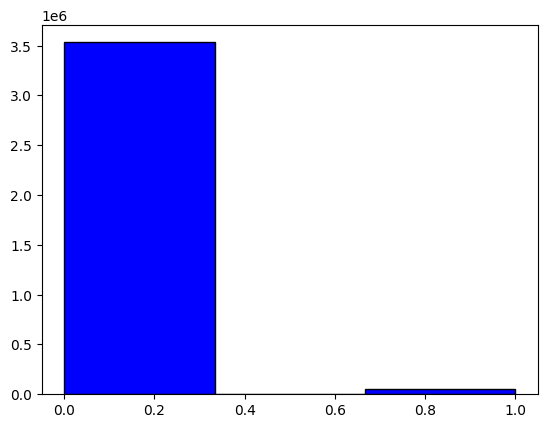

In [27]:
his = plt.hist(train_ds['churn'], color = 'blue', edgecolor = 'black',
         bins = int(180/50))
plt.show()

In [ ]:
X_train = train_ds.loc[:, train_ds.columns !='churn']
y_train = train_ds['churn']
nm = NearMiss()
X_train, y_train = nm.fit_resample(X_train, y_train.ravel())

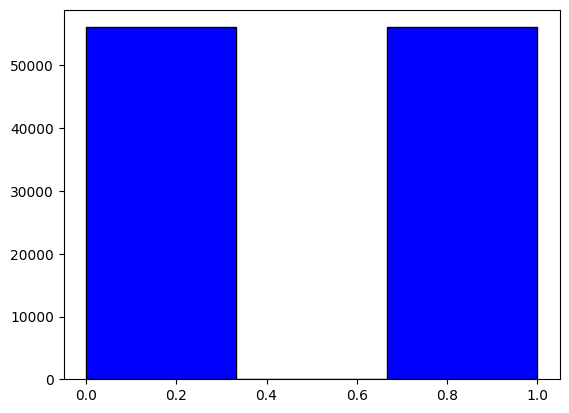

In [9]:
his = plt.hist(y_train, color = 'blue', edgecolor = 'black',
         bins = int(180/50))
plt.show()

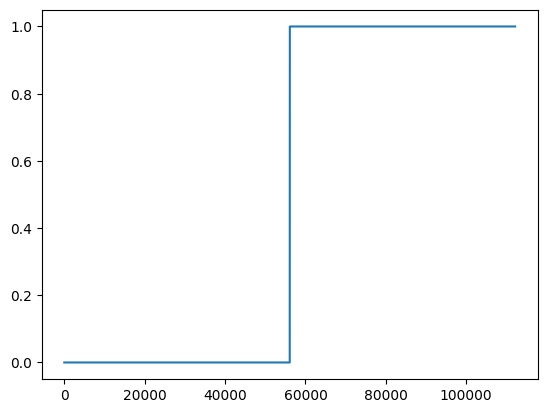

In [10]:
plt.plot(list(range(len(y_train))), y_train)

In [11]:
merge_xy = pd.concat([X_train, pd.DataFrame({'churn': y_train})], axis=1)
merge_xy = merge_xy.sample(frac=1)
X_train = merge_xy.loc[:, merge_xy.columns !='churn']
y_train = merge_xy['churn']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
print(y_train[102])

0


In [ ]:
# train_for_year = train_ds.loc[:, ~train_ds.columns.isin(['pmnts_sum_per_qrtr', 'pmnts_nmbr_per_qrtr'])]
# train_for_qrtr = train_ds.loc[:, ~train_ds.columns.isin(['pmnts_sum_per_year', 'pmnts_nmbr_per_year'])]
# test_for_year = test_ds.loc[:, ~test_ds.columns.isin(['pmnts_sum_per_qrtr', 'pmnts_nmbr_per_qrtr'])]
# test_for_qrtr = test_ds.loc[:, ~test_ds.columns.isin(['pmnts_sum_per_year', 'pmnts_nmbr_per_year'])]
# test_for_qrtr.shape[0]

In [ ]:
# x_train_year = train_for_year.loc[:, train_for_year.columns !='churn']
# y_train_year = train_for_year['churn']
# x_test_year = test_for_year.loc[:, test_for_year.columns !='churn']
# y_test_year = test_for_year['churn']

# x_train_qrtr = train_for_qrtr.loc[:, train_for_qrtr.columns !='churn']
# y_train_qrtr = train_for_qrtr['churn']
# x_test_qrtr = test_for_qrtr.loc[:, test_for_qrtr.columns !='churn']
# y_test_qrtr = test_for_qrtr['churn']

In [ ]:
classes = {0:'Не уйдет', 1:'Уйдет'}

In [ ]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
# y_train_year = utils.to_categorical(y_train_year)
# y_train_qrtr = utils.to_categorical(y_train_qrtr)
# y_test_year = utils.to_categorical(y_test_year)
# y_test_qrtr = utils.to_categorical(y_test_qrtr)

# y_train_year = np.asarray(y_train_year).astype('float32')
# y_test_qrtr = np.asarray(y_train_qrtr).astype('float32')
# y_train_year[111]
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(units=500, input_dim=15, activation="tanh"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(units=2, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
# model_for_year = Sequential()
# # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
# model_for_year.add(Dense(units=2, input_dim=4, activation="relu"))
# # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
# model_for_year.add(Dense(units=2, activation="sigmoid"))

# model_for_year.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
# model_for_qrtr = Sequential()
# # Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
# model_for_qrtr.add(Dense(units=800, input_dim=4, activation="relu"))
# # Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
# model_for_qrtr.add(Dense(units=1, activation="softmax"))

# model_for_qrtr.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
print(model.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 500)               8000      
                                                                 
 dense_55 (Dense)            (None, 2)                 1002      
                                                                 
Total params: 9002 (35.16 KB)
Trainable params: 9002 (35.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# обучение
history=model.fit(X_train, y_train,
          batch_size=1000,
          epochs=5,
          validation_split=0.1,
          verbose=1)

Epoch 1/5
71/71 [==============================] - 3s 20ms/step - loss: 0.2267 - accuracy: 0.9163 - val_loss: 0.1575 - val_accuracy: 0.9464
Epoch 2/5
71/71 [==============================] - 1s 12ms/step - loss: 0.1634 - accuracy: 0.9412 - val_loss: 0.1419 - val_accuracy: 0.9507
Epoch 3/5
71/71 [==============================] - 1s 12ms/step - loss: 0.1515 - accuracy: 0.9464 - val_loss: 0.1313 - val_accuracy: 0.9543
Epoch 4/5
71/71 [==============================] - 1s 12ms/step - loss: 0.1449 - accuracy: 0.9483 - val_loss: 0.1300 - val_accuracy: 0.9557
Epoch 5/5
71/71 [==============================] - 1s 11ms/step - loss: 0.1409 - accuracy: 0.9503 - val_loss: 0.1310 - val_accuracy: 0.9538


In [ ]:
model.save('/content/drive/MyDrive/NPF/Neur95/loyality_clients.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


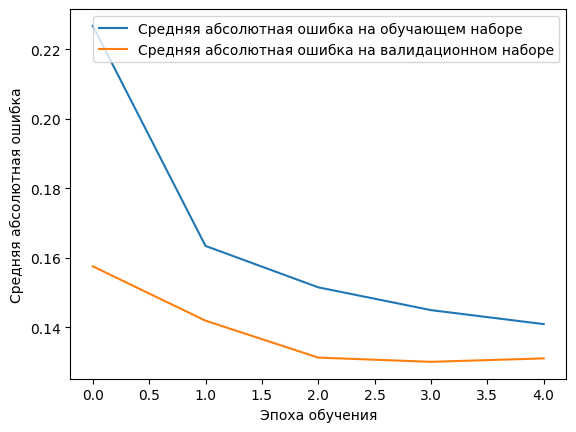

In [ ]:
plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолютная ошибка на валидационном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
scores=model.evaluate(X_test, y_test)
scores[1]

1052/1052 [==============================] - 2s 2ms/step - loss: 0.1383 - accuracy: 0.9513


0.9512673616409302

In [ ]:
pred=model.predict(X_test)
pred

1052/1052 [==============================] - 1s 928us/step


array([[0.03700102, 0.97226465],
       [0.96478444, 0.02999215],
       [0.9655336 , 0.03473468],
       ...,
       [0.05353509, 0.9769774 ],
       [0.86877275, 0.16936694],
       [0.01521704, 0.9812834 ]], dtype=float32)

In [ ]:
print(pred[1])

[0.9733288  0.02616714]


In [ ]:
test_index=6
print('Предсказанное поведение:', classes[np.argmax(pred[test_index])],
      ', фактическое поведение:', classes[np.argmax(y_test[test_index])])

Предсказанное поведение: Не уйдет , фактическое поведение: Не уйдет


In [ ]:
# y_test = np.argmax(y_test, axis=1)
pred = np.argmax(pred, axis=1)

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
y_test

array([1, 0, 0, ..., 1, 0, 1])

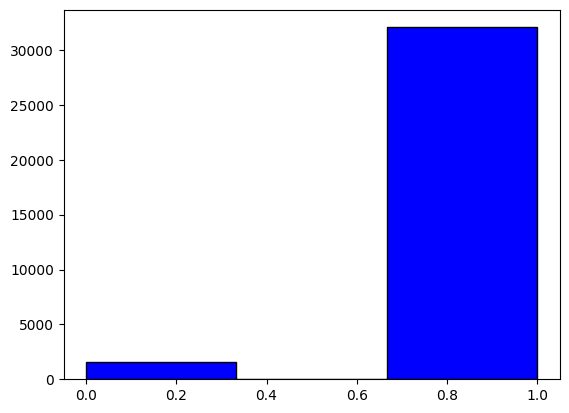

In [ ]:
graph_list = []
for i in range(len(pred)):
  if pred[i] == y_test[i]:
    graph_list.append(1)
  else:
    graph_list.append(0)

his = plt.hist(graph_list, color = 'blue', edgecolor = 'black',
         bins = int(180/50))


In [ ]:
model = load_model('/content/drive/MyDrive/NPF/Neur95/saved_model.pb')

OSError: Unable to open file (file signature not found)